In [1]:
import rasterio
import rasterio.plot

In [2]:
data_name = "spam2010V2r0_global_P_MAIZ_A.tif" #all types: irrigation + rainfed
data_name1= 'spam2010V2r0_global_P_MAIZ_I.tif' #irrigation
#tiff = rasterio.open(data_name)
#rasterio.plot.show(tiff, title = "Maize")

In [3]:
#!pip install geotiff
#https://pypi.org/project/geotiff/
from geotiff import GeoTiff

In [4]:
import os
tiff_file='spam2010V2r0_global_P_MAIZ_A.tif'
metadata = os.popen(tiff_file).read()
geo_tiff = GeoTiff(tiff_file, band=0)
geo_tiff1 = GeoTiff(data_name1, band=0)

In [5]:
metadata

''

In [6]:
import numpy as np
zarr_array = geo_tiff.read()
global_array=np.array(zarr_array)

In [7]:
area_box =[(-100,65),(-70,35)]
wgs_84_box = geo_tiff.get_bBox_wgs_84(area_box)

In [8]:
array = geo_tiff.read_box(wgs_84_box,outer_points=2)
array1 = geo_tiff1.read_box(wgs_84_box,outer_points=2)

In [9]:
array=array-array1
array[array==0]=np.nan

In [10]:
#lon_array, lat_array = geo_tiff.get_coord_arrays(area_box,outer_points=2)
#this does not work with negtiave longitude

In [11]:
wgs_84_box

((-99.91698699999999, 64.916767), (-70.00044, 35.00022))

In [12]:
lon_array, lat_array = geo_tiff.get_coord_arrays(wgs_84_box,outer_points=2)

In [13]:
lon_array.shape

(362, 362)

In [14]:
array.shape

(362, 362)

In [15]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
# import numpy as np
# import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

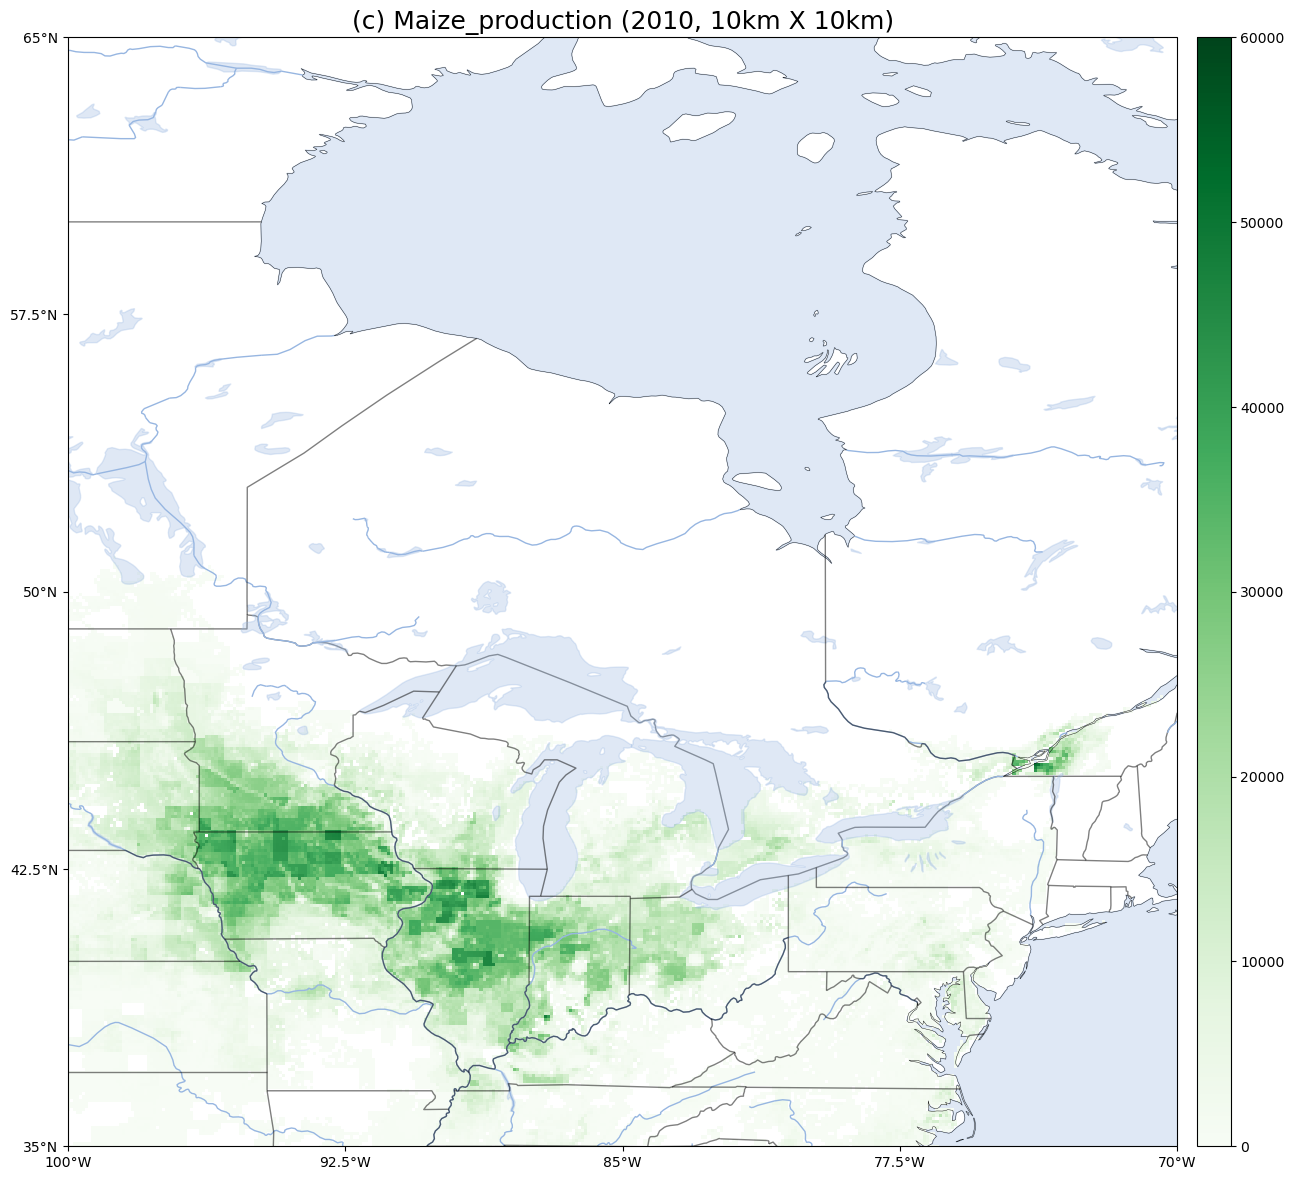

In [16]:
# lats = cropped_ds['yield-mai-noirr'].coords['lat'][:]
# lons = cropped_ds['yield-mai-noirr'].coords['lon'][:]

# ct_x=[-79.617,-75.717,-86.917,-93.783]
# ct_y=[43.667,45.383,49.767,51.067]
# ct_n=['Toronto','Ottawa','Geraldton','Red Lake']

ct_x=[-94.75,-87.75,-81.25,-73.25]
ct_y=[43.25,38.75,43.75,45.75]
ct_n=['A','B','C','D']

projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
title_text=["season=DJF(m/s)", "season=MAM(m/s)", "season=JJA(m/s)", "season=SON(m/s)"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 1),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN,alpha=0.3)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title('(c) Maize_production (2010, 10km X 10km)',fontsize=18)
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 65, 5), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
#     #ax.imshow(im, aspect='auto',extent=(-75,-70,35,37),zorder=-1)
#     ax.text(-75,37.5,"yorku.ca/ocdp",fontsize=18)
#     ax.text(-85,60,"Hudson Buy", fontsize=20,color='b',alpha=0.5)

#     ax.annotate(ct_n[0], (ct_x[0], ct_y[0]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[1], (ct_x[1], ct_y[1]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[2], (ct_x[2], ct_y[2]),va="top", ha="center",fontsize=14) 
#     ax.annotate(ct_n[3], (ct_x[3], ct_y[3]),va="top", ha="center",fontsize=14) 
    p = ax.pcolormesh(lon_array, lat_array, array,
                      vmin=0,
                      vmax=60000,                      
                      transform=projection,
                      cmap='Greens'  )
#     p = ax.contourf(lons, lats, t1m,50,
#                         transform=projection,
#                         cmap='BrBG')
#     ax.scatter(ct_x, ct_y,transform=ccrs.PlateCarree(),color='r')
#     l = ax.contour(lons, lats, t1m,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())

#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
    
axgr.cbar_axes[0].colorbar(p)
plt.show()
fig.savefig('yieds_projections_figures/figure4c_spam2000_maize_rainfed_2010_averaged_production.png',dpi=150)

In [17]:
np.save('spam2010_rainfed_maize_production.npy',array)

In [18]:
np.save('spam_rainfed_maize_lon_array.npy',lon_array)

In [19]:
np.save('spam_rainfed_maize_lat_array.npy',lat_array)